In [8]:
import numpy as np
import pandas as pd
import scipy 
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal

table1 = pd.read_csv(r"C:\Users\Abhimkul\Downloads\Table1_Rx.txt" , sep = " ")
table2 = pd.read_csv(r"C:\Users\Abhimkul\Downloads\Table2.tab" , na_values="-",sep='\t')

#table2
table2['EoS'] = table2['EoS'].str.upper()
table2

A = pd.merge(table2,table1)

min = A["M_chirp"].min()
max = A["M_chirp"].max()

#M = np.linspace(1.04 , 1.65 ,88)

M = A["M_chirp"]
R = A["R_1.8"]
f = A["f_peak"]

# X = M,R
# X = np.column_stack((M, R))

X = M,R

def formula1(X,a,b,c,d,e,f):
    
    return a + b*M +c*(M**2) + d*R*(M) + e*R*(M)**2 + f*(R**2)*M

coeffs , covm  = curve_fit(formula1, X, f)
coeffs

#table2



array([ 2.44681316,  4.94637345,  4.47812428, -0.9859813 , -0.23714452,
        0.03754138])

In [9]:
np.random.seed(20231123)

samples = np.random.multivariate_normal(mean=coeffs, cov=covm, size=1000)

df1 = pd.DataFrame(data = samples)
df1.to_csv(r"C:\Users\Abhimkul\Desktop\R12.tab" , index= False , sep=' ')

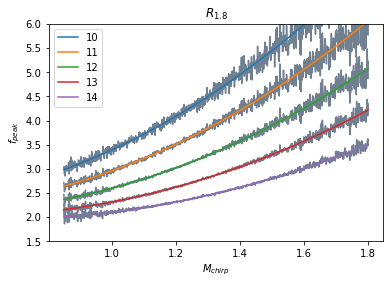

In [12]:
b0 = coeffs[0]
b1 = coeffs[1]
b2 = coeffs[2]
b3 = coeffs[3]
b4 = coeffs[4]
b5 = coeffs[5]

# Fit 
import matplotlib.pyplot as plot


def formula(M,R):
    
    return b0 + b1*M +b2*(M**2) + b3*R*(M) + b4*R*(M)**2 + b5*(R**2)*M


# Empirical Coefficients

file = r"C:\Users\Abhimkul\Desktop\R12.tab"
df = pd.read_csv(file , sep = " ")

a0 = df["(Intercept)"]
a1 = df["M_chirp"]
a2 = df["I(M_chirp^2)"]
a3 = df["I(R_1.6 * M_chirp)"]
a4 = df["I(R_1.6 * M_chirp^2)"]
a5 = df["I(R_1.6^2 * M_chirp)"]

def f1(M,R):
  return a0 + a1*Mchirp + a2*Mchirp**2 + a3*Mchirp*R + a4*R*M**2 + a5*M*R**2

#Plotting - 1

for i in range(10,15):
  Mchirp = np.linspace(0.85,1.8,1000)
  fpeak = f1(Mchirp,i)
  plot.plot(Mchirp,fpeak, color = "slategray")

##Plotting - 2 

Mchirp = np.linspace(0.85,1.8,2000)
for i in range(10,15):
  fpeak = formula(Mchirp,i)
  plot.plot(Mchirp,fpeak , label =  i)

plot.ylim(1.5,6)
plot.xlabel("$M_{chirp}$")
plot.ylabel("$f_{peak}$")
plot.title("$R_{1.8}$")
plot.legend()
plot.show()

